# Summer of Code 2021 - Computational Drug Discovery using QSAR

## Installation of the libraries

We are installing the package that will help us obtain the bioactivity data of the drug molecules from the ChemBL database. Here is the link to the database: https://www.ebi.ac.uk/chembl/

The library **chembl_webresource_client** was installed using Conda, by running the command:

In [1]:
#! conda install -c conda-forge chembl_webresource_client

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from chembl_webresource_client.new_client import new_client

## Search for a target protein

In [2]:
target=new_client.target
query=target.search('breast cancer')
target_df=pd.DataFrame.from_dict(query)

In [3]:
target_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,26.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Breast cancer cell lines,22.0,False,CHEMBL614788,[],CELL-LINE,9606.0
2,"[{'xref_id': 'Q7RTN6', 'xref_name': None, 'xre...",Homo sapiens,STE20-related kinase adapter protein alpha,18.0,False,CHEMBL1795198,"[{'accession': 'Q7RTN6', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,[],Homo sapiens,Kinesin-like protein KIF15,18.0,False,CHEMBL3632454,"[{'accession': 'Q9NS87', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Rattus norvegicus,ATP-binding cassette sub-family G member 2,17.0,False,CHEMBL3509585,"[{'accession': 'Q80W57', 'component_descriptio...",SINGLE PROTEIN,10116.0
...,...,...,...,...,...,...,...,...,...
72,[],Homo sapiens,Serine/threonine-protein kinase Aurora,3.0,False,CHEMBL3430911,"[{'accession': 'Q96GD4', 'component_descriptio...",PROTEIN FAMILY,9606.0
73,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
74,[],Homo sapiens,26S proteasome,1.0,False,CHEMBL2364701,"[{'accession': 'Q99460', 'component_descriptio...",PROTEIN COMPLEX,9606.0
75,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


In [5]:
target_df.dtypes

cross_references       object
organism               object
pref_name              object
score                 float64
species_group_flag       bool
target_chembl_id       object
target_components      object
target_type            object
tax_id                float64
dtype: object

Let us choose the target protein as Anoctamin-1.

In [4]:
idx=target_df.index
req_target=target_df["pref_name"]=="Anoctamin-1"
array_index_target=idx[req_target]

In [5]:
index_target=array_index_target[0]

In [6]:
index_target

54

#### Extracting the ChemBL ID of the target protein (Anoctamin-1) from the dataframe

In [7]:
chembl_id_target=target_df.iloc[index_target].target_chembl_id

In [8]:
chembl_id_target

'CHEMBL2046267'

#### Extracting the IC50 activity of the target protein (Anoctamin-1) from the dataframe

In [9]:
activity=new_client.activity
res=activity.filter(target_chembl_id=chembl_id_target).filter(standard_type="IC50")
activity_df=pd.DataFrame.from_dict(res)
activity_df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,10943671,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,28.7
1,None,10943672,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,5.9
2,None,10943673,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,16.3
3,None,10943674,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,29.2
4,None,10943675,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,None,18873550,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
116,None,18873551,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
117,None,18873552,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
118,Not Active,18873553,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,None,None,None,None


In [10]:
activity_df.standard_type.unique()

array(['IC50'], dtype=object)

In [11]:
activity_df.to_csv("activity.csv", index=False)

There are around 120 assays revolving around this protein as the drug target. We have now written them into the file **activity.csv**

In [14]:
#! head activity.csv

## Missing values

In this case, imputation of the standard value of IC50 is meaningless and hence we must drop the entries whose standard value is missing.

In [12]:
activity_df2=activity_df[activity_df.standard_value.notna()]
activity_df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,10943671,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,28.7
1,None,10943672,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,5.9
2,None,10943673,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,16.3
3,None,10943674,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,29.2
4,None,10943675,[],CHEMBL2050116,Inhibition of human TMEM16A transfected in FRT...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,None,18873549,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,31.3
115,None,18873550,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
116,None,18873551,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,100.0
117,None,18873552,[],CHEMBL4310424,Inhibition of YFP-fused ANO1 (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Anoctamin-1,9606,None,None,IC50,uM,UO_0000065,None,100.0


Luckily, only 2 entries had missing standard values of IC50 and they have now been removed. We now have 118 entries remaining.

## Labelling drug compounds based on IC50

The IC50 is measured in nM. Let us label the compound as active if the IC50 is at most 1000 nM, inactive if IC50 is at least 10000 nM and intermediate if otherwise.

In [13]:
def activity_label(entry):
    if float(entry)<=1000:
        return "active"
    if float(entry)>=10000:
        return "inactive"
    else:
        return "intermediate"

In [14]:
data=[activity_df2["molecule_chembl_id"],activity_df2["canonical_smiles"], activity_df2["standard_value"]]
headers=["molecule_chembl_id", "canonical_smiles", "standard_value"]
activity_df3 = pd.concat(data, axis=1, keys=headers)

In [15]:
activity_df3["label"] = activity_df3.apply(lambda row: activity_label(row["standard_value"]), axis=1)

In [44]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
activity_df3

,molecule_chembl_id,canonical_smiles,standard_value,label
0,CHEMBL2046972,COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1,28700.0,inactive
1,CHEMBL2046973,COc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1,5900.0,intermediate
2,CHEMBL2046974,COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1,16300.0,inactive
3,CHEMBL2047075,COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1,29200.0,inactive
4,CHEMBL2047076,COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1,27000.0,inactive
...,...,...,...,...
114,CHEMBL4517769,Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1,31300.0,inactive
115,CHEMBL4581421,Cc1cc(Cl)ccc1OCc1nnc(-c2ccccn2)o1,100000.0,inactive
116,CHEMBL4471557,CCOC(=O)c1cc2ccccn2c1/C=N/NC(=O)COc1ccc(Cl)cc1C,100000.0,inactive
117,CHEMBL4453183,Cc1cc(Cl)ccc1OC(C)C(=O)N/N=C/c1ccccc1OC(F)(F)F,100000.0,inactive


In [17]:
activity_df3.to_csv("activity_processed.csv", index=False)
gg=pd.read_csv("activity_processed.csv")

In [18]:
gg

,molecule_chembl_id,canonical_smiles,standard_value,label
0,CHEMBL2046972,COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1,28700.0,inactive
1,CHEMBL2046973,COc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1,5900.0,intermediate
2,CHEMBL2046974,COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1,16300.0,inactive
3,CHEMBL2047075,COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1,29200.0,inactive
4,CHEMBL2047076,COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1,27000.0,inactive
...,...,...,...,...
113,CHEMBL4517769,Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1,31300.0,inactive
114,CHEMBL4581421,Cc1cc(Cl)ccc1OCc1nnc(-c2ccccn2)o1,100000.0,inactive
115,CHEMBL4471557,CCOC(=O)c1cc2ccccn2c1/C=N/NC(=O)COc1ccc(Cl)cc1C,100000.0,inactive
116,CHEMBL4453183,Cc1cc(Cl)ccc1OC(C)C(=O)N/N=C/c1ccccc1OC(F)(F)F,100000.0,inactive


In [19]:
activity_df3=gg

In [20]:
activity_df3

,molecule_chembl_id,canonical_smiles,standard_value,label
0,CHEMBL2046972,COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1,28700.0,inactive
1,CHEMBL2046973,COc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1,5900.0,intermediate
2,CHEMBL2046974,COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1,16300.0,inactive
3,CHEMBL2047075,COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1,29200.0,inactive
4,CHEMBL2047076,COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1,27000.0,inactive
...,...,...,...,...
113,CHEMBL4517769,Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1,31300.0,inactive
114,CHEMBL4581421,Cc1cc(Cl)ccc1OCc1nnc(-c2ccccn2)o1,100000.0,inactive
115,CHEMBL4471557,CCOC(=O)c1cc2ccccn2c1/C=N/NC(=O)COc1ccc(Cl)cc1C,100000.0,inactive
116,CHEMBL4453183,Cc1cc(Cl)ccc1OC(C)C(=O)N/N=C/c1ccccc1OC(F)(F)F,100000.0,inactive


## Lipinski Rule descriptors

### Install libraries

In [50]:
#! conda install -c rdkit rdkit

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [22]:
#Reference: https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb 


def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors


In [23]:
lipinski_df=lipinski(activity_df3.canonical_smiles)

In [24]:
lipinski_df

,MW,LogP,NumHDonors,NumHAcceptors
0,392.382,5.52470,1.0,4.0
1,500.288,5.99020,1.0,4.0
2,453.288,6.14810,1.0,4.0
3,408.837,6.03900,1.0,4.0
4,410.372,5.66380,1.0,4.0
...,...,...,...,...
113,303.749,2.57252,1.0,4.0
114,301.733,3.67242,0.0,5.0
115,413.861,3.60692,1.0,6.0
116,400.784,4.46462,1.0,4.0


### Combining the activity data and the lipinski descriptor data into a single DF

In [25]:
data=[activity_df3, lipinski_df]
#headers=["molecule_chembl_id", "canonical_smiles", "standard_value", "label", "MW","LogP","NumHDonors","NumHAcceptors"]
lip_act_df=pd.concat(data, axis=1)

In [26]:
lip_act_df

,molecule_chembl_id,canonical_smiles,standard_value,label,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2046972,COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1,28700.0,inactive,392.382,5.52470,1.0,4.0
1,CHEMBL2046973,COc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1,5900.0,intermediate,500.288,5.99020,1.0,4.0
2,CHEMBL2046974,COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1,16300.0,inactive,453.288,6.14810,1.0,4.0
3,CHEMBL2047075,COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1,29200.0,inactive,408.837,6.03900,1.0,4.0
4,CHEMBL2047076,COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1,27000.0,inactive,410.372,5.66380,1.0,4.0
...,...,...,...,...,...,...,...,...
113,CHEMBL4517769,Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1,31300.0,inactive,303.749,2.57252,1.0,4.0
114,CHEMBL4581421,Cc1cc(Cl)ccc1OCc1nnc(-c2ccccn2)o1,100000.0,inactive,301.733,3.67242,0.0,5.0
115,CHEMBL4471557,CCOC(=O)c1cc2ccccn2c1/C=N/NC(=O)COc1ccc(Cl)cc1C,100000.0,inactive,413.861,3.60692,1.0,6.0
116,CHEMBL4453183,Cc1cc(Cl)ccc1OC(C)C(=O)N/N=C/c1ccccc1OC(F)(F)F,100000.0,inactive,400.784,4.46462,1.0,4.0


### Convert IC50 to pIC50

Replace the nM value to -log10(M)

In [27]:
def pIC50(std_value):
    #if float(std_value)>1e9:
        #return float(std_value)
    #else:
    return -np.log10(float(std_value)*10**(-9))

In [28]:
lip_act_df["standard_value"]=lip_act_df.apply(lambda row: pIC50(row["standard_value"]), axis=1)

In [29]:
lip_act_df

,molecule_chembl_id,canonical_smiles,standard_value,label,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2046972,COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1,4.542118,inactive,392.382,5.52470,1.0,4.0
1,CHEMBL2046973,COc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1,5.229148,intermediate,500.288,5.99020,1.0,4.0
2,CHEMBL2046974,COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1,4.787812,inactive,453.288,6.14810,1.0,4.0
3,CHEMBL2047075,COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1,4.534617,inactive,408.837,6.03900,1.0,4.0
4,CHEMBL2047076,COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1,4.568636,inactive,410.372,5.66380,1.0,4.0
...,...,...,...,...,...,...,...,...
113,CHEMBL4517769,Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1,4.504456,inactive,303.749,2.57252,1.0,4.0
114,CHEMBL4581421,Cc1cc(Cl)ccc1OCc1nnc(-c2ccccn2)o1,4.000000,inactive,301.733,3.67242,0.0,5.0
115,CHEMBL4471557,CCOC(=O)c1cc2ccccn2c1/C=N/NC(=O)COc1ccc(Cl)cc1C,4.000000,inactive,413.861,3.60692,1.0,6.0
116,CHEMBL4453183,Cc1cc(Cl)ccc1OC(C)C(=O)N/N=C/c1ccccc1OC(F)(F)F,4.000000,inactive,400.784,4.46462,1.0,4.0


In [33]:
lip_act_df=lip_act_df.rename(columns={"standard_value":"pIC50"})

In [34]:
lip_act_df.pIC50

0      4.542118
1      5.229148
2      4.787812
3      4.534617
4      4.568636
         ...   
113    4.504456
114    4.000000
115    4.000000
116    4.000000
117    4.000000
Name: pIC50, Length: 118, dtype: float64

Note: One can remove the _intermediate_ class if we wish to compare only the compunds labelled _active_ and _inactive_. 

### Frequency plot of the compound labels (active, inactive, intermediate)

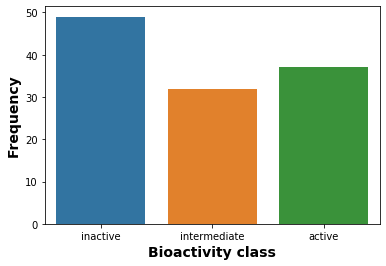

In [35]:
import seaborn as sns

ax = sns.countplot(x="label",data=lip_act_df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png')

### MW vs LogP

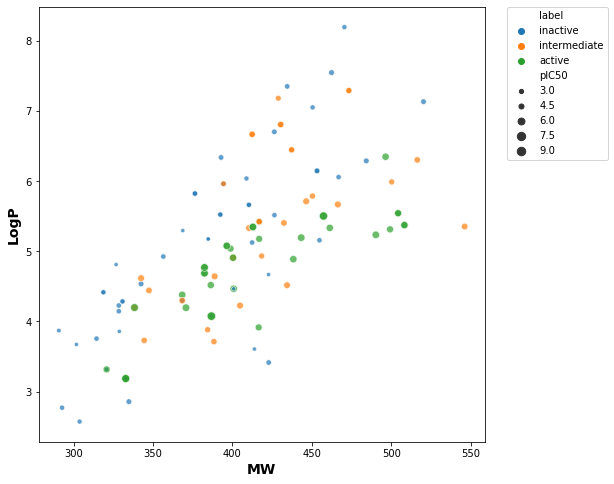

In [37]:
#Reference: https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb

plt.figure(figsize=(8, 8))

sns.scatterplot(x='MW', y='LogP', data=lip_act_df, hue='label',size='pIC50', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')

### Boxplots

#### pIC50

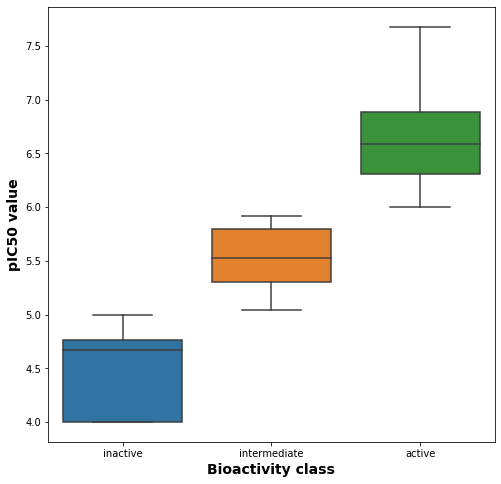

In [38]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'label', y = 'pIC50', data = lip_act_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pIC50.png')

#### MW

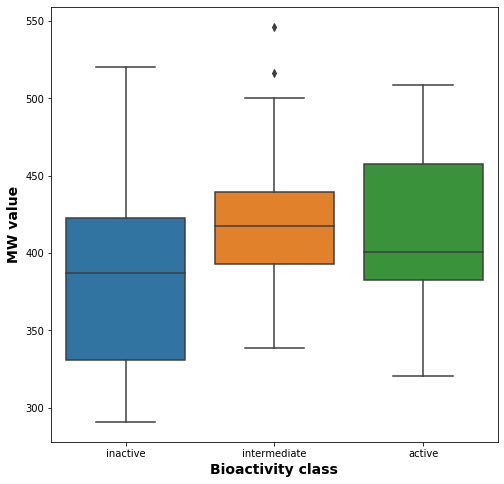

In [41]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'label', y = 'MW', data = lip_act_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW value', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.png')

#### LogP

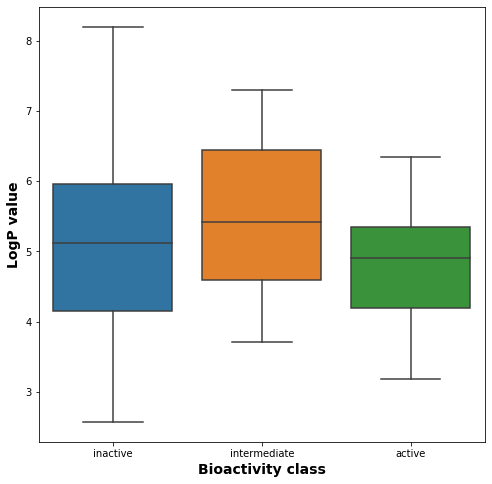

In [42]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'label', y = 'LogP', data = lip_act_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP value', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.png')

#### NumHDonors

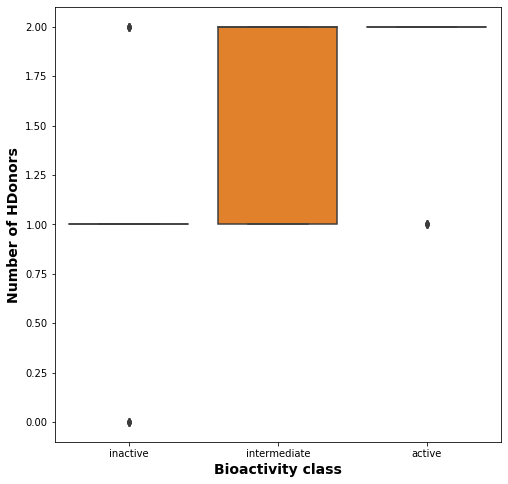

In [45]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'label', y = 'NumHDonors', data = lip_act_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Number of HDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.png')

#### NumHAcceptors

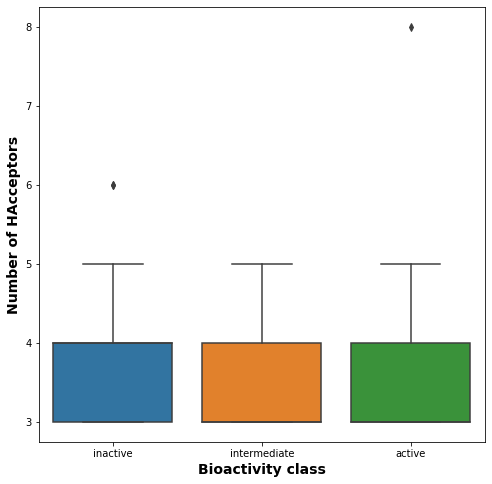

In [46]:
plt.figure(figsize=(8, 8))

sns.boxplot(x = 'label', y = 'NumHAcceptors', data = lip_act_df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Number of HAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.png')

For our statistical purposes let us compare only _inactive_ and _active_ groups like mentioned above.

In [47]:
df_minus_int = lip_act_df[lip_act_df.label != 'intermediate']
df_minus_int

,molecule_chembl_id,canonical_smiles,pIC50,label,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2046972,COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1,4.542118,inactive,392.382,5.52470,1.0,4.0
2,CHEMBL2046974,COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1,4.787812,inactive,453.288,6.14810,1.0,4.0
3,CHEMBL2047075,COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1,4.534617,inactive,408.837,6.03900,1.0,4.0
4,CHEMBL2047076,COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1,4.568636,inactive,410.372,5.66380,1.0,4.0
5,CHEMBL2047078,COc1ccc(-c2oc3ccc(OCc4ccc(F)c(F)c4)cc3c2C(=O)O...,4.628932,inactive,410.372,5.66380,1.0,4.0
...,...,...,...,...,...,...,...,...
113,CHEMBL4517769,Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1,4.504456,inactive,303.749,2.57252,1.0,4.0
114,CHEMBL4581421,Cc1cc(Cl)ccc1OCc1nnc(-c2ccccn2)o1,4.000000,inactive,301.733,3.67242,0.0,5.0
115,CHEMBL4471557,CCOC(=O)c1cc2ccccn2c1/C=N/NC(=O)COc1ccc(Cl)cc1C,4.000000,inactive,413.861,3.60692,1.0,6.0
116,CHEMBL4453183,Cc1cc(Cl)ccc1OC(C)C(=O)N/N=C/c1ccccc1OC(F)(F)F,4.000000,inactive,400.784,4.46462,1.0,4.0


Text(0, 0.5, 'Number of compounds')

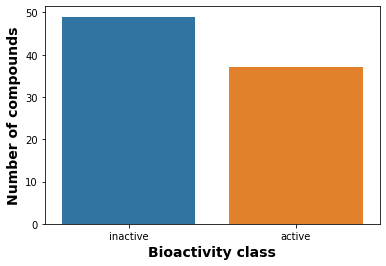

In [49]:
import seaborn as sns

ax = sns.countplot(x="label",data=df_minus_int)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Number of compounds', fontsize=14, fontweight='bold')

### Statistical test of difference between labels

We will be using the Mann Whitney U test. The null hypothesis is that the mean of the two classes (_active_ and _inactive_) is the same. Here we test whether there is a statistical difference between the bioactivity classes, on the basis of five criteria: pIC50 and the 4 Lipinski descriptors.

In [55]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

In [56]:
#Reference: https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb 
def mannwhitney(descriptor, verbose=False):
     # seed the random number generator
    seed(1)
    selection = [descriptor, 'label']
    df = df_minus_int[selection]
    active = df[df.label == 'active']
    active = active[descriptor]

    selection = [descriptor, 'label']
    df = df_minus_int[selection]
    inactive = df[df.label == 'inactive']
    inactive = inactive[descriptor]
    
    # compare samples
    stat, p = mannwhitneyu(active, inactive)
      #print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

In [57]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.146979e-15,0.05,Different distribution (reject H0)


In [58]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,665.5,0.017944,0.05,Different distribution (reject H0)


In [59]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,793.5,0.16319,0.05,Same distribution (fail to reject H0)


In [60]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,379.0,2.109629e-07,0.05,Different distribution (reject H0)


In [61]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,587.5,0.001068,0.05,Different distribution (reject H0)


So, except for LogP, the two bioactivity classes show statistically significant difference in the other criteria.

## PaDEL-descriptor

Install ```padel.zip``` and ```padel.sh``` from 
https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip and
https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh respectively.


Unzip the above zip folder.

In [68]:
selection = ['canonical_smiles','molecule_chembl_id']
lip_act_df_selection = lip_act_df[selection]
lip_act_df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [81]:
! cat molecule.smi 

COc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1	CHEMBL2046972
COc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1	CHEMBL2046973
COc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1	CHEMBL2046974
COc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1	CHEMBL2047075
COc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1	CHEMBL2047076
COc1ccc(-c2oc3ccc(OCc4ccc(F)c(F)c4)cc3c2C(=O)O)cc1	CHEMBL2047078
COc1ccc(-c2oc3ccc(OCc4ccc(F)cc4)cc3c2C(=O)O)cc1	CHEMBL2047079
COc1ccc(-c2oc3ccc(OCc4ccccc4Br)cc3c2C(=O)O)cc1	CHEMBL2047080
COc1ccc(-c2oc3ccc(OCc4cccc(-c5ccccc5)c4)cc3c2C(=O)O)cc1	CHEMBL2047081
Cc1ccc(-c2oc3ccc(OCc4cccc(F)c4)cc3c2C(=O)O)cc1	CHEMBL2046450
Cc1ccc(-c2oc3ccc(OCc4cccc(I)c4)cc3c2C(=O)O)cc1	CHEMBL2047082
Cc1ccc(-c2oc3ccc(OCc4ccc(Br)cc4)cc3c2C(=O)O)cc1	CHEMBL2047083
Cc1ccc(-c2oc3ccc(OCc4cccc(Cl)c4)cc3c2C(=O)O)cc1	CHEMBL2047084
Cc1ccc(-c2oc3ccc(OCc4c(F)cccc4F)cc3c2C(=O)O)cc1	CHEMBL2047085
Cc1ccc(-c2oc3ccc(OCc4cccc(C(F)(F)F)c4)cc3c2C(=O)O)cc1	CHEMBL2047086
Cc1ccc(-c2oc3ccc(OCc4ccc(F)c(F)c4)cc3c2C(=O)O)cc1	CHE

### Calculate PaDEL descriptors

This is done using the bash script that we downloaded above. Let us run it. 
Note: Ensure that the ```padel.sh``` script and the ```PaDEL-descriptor``` folders are in the same directory.

In [72]:
! bash padel.sh

Processing CHEMBL2046972 in molecule.smi (1/118). 
Processing CHEMBL2046973 in molecule.smi (2/118). 
Processing CHEMBL2047075 in molecule.smi (4/118). 
Processing CHEMBL2046974 in molecule.smi (3/118). 
Processing CHEMBL2047078 in molecule.smi (6/118). Average speed: 1.25 s/mol.
Processing CHEMBL2047076 in molecule.smi (5/118). Average speed: 2.43 s/mol.
Processing CHEMBL2047079 in molecule.smi (7/118). Average speed: 1.28 s/mol.
Processing CHEMBL2047080 in molecule.smi (8/118). Average speed: 0.87 s/mol.
Processing CHEMBL2046450 in molecule.smi (10/118). Average speed: 0.64 s/mol.
Processing CHEMBL2047081 in molecule.smi (9/118). Average speed: 0.76 s/mol.
Processing CHEMBL2047082 in molecule.smi (11/118). Average speed: 0.56 s/mol.
Processing CHEMBL2047083 in molecule.smi (12/118). Average speed: 0.49 s/mol.
Processing CHEMBL2047084 in molecule.smi (13/118). Average speed: 0.52 s/mol.
Processing CHEMBL2047085 in molecule.smi (14/118). Average speed: 0.47 s/mol.
Processing CHEMBL2047

### Preparing the X and Y matrices for regression

In [82]:
X=pd.read_csv("descriptors_output.csv")
X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2046973,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2046972,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2047075,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2046974,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2047076,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,CHEMBL4080525,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,CHEMBL4581421,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,CHEMBL4471557,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,CHEMBL4453183,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X = X.drop(columns=['Name'])

In [84]:
y=lip_act_df["pIC50"]
y

0      4.542118
1      5.229148
2      4.787812
3      4.534617
4      4.568636
         ...   
113    4.504456
114    4.000000
115    4.000000
116    4.000000
117    4.000000
Name: pIC50, Length: 118, dtype: float64

In [87]:
dataset=pd.concat([X,y],axis=1)

In [88]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.542118
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.229148
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.787812
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.534617
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.568636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.504456
114,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
115,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
116,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


In [90]:
dataset.to_csv("dataset_for_model_building.csv",index=False)

Note: the bash script generates the PubChem fingerprints (PubchemFP) of the 118 compounds. The PubChem fingerprint, as the name suggests, is a unique group of digits that describe the chemical structural makeup of the compound. It is 881 digits long, hence we see 881 input features in X.

## Model Building

In [ ]:
Let us plot the correlation matrix of the features (PubChem fingerprint).

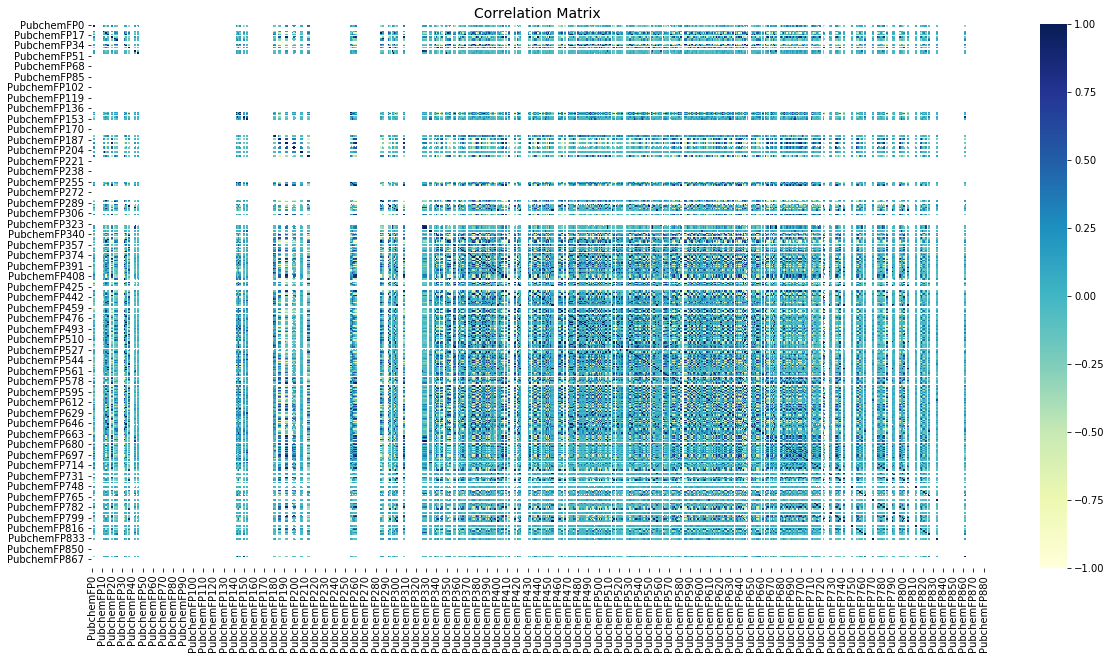

In [92]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

In [94]:
X.isna().sum()

PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
PubchemFP4      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 881, dtype: int64

Let us now try out various regression models for the target variable.

### Removing low variance features

First, we attempt to remove the features (in this case the fingerprint digits) which show less variation in the compounds. These features provide no valuable information and their removal contributes to feature selection.

In [97]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [98]:
X

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1]])

### Split dataset into training and testing

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=3) #80-20 rule

In [109]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
np.random.seed(10)
RFA = RandomForestRegressor(n_estimators=5000)
RFA.fit(X_train, y_train)
score = RFA.score(X_test, y_test)
score

-0.1756943977574379

Even on increasing the number of estimators, the score remains quite negative and does not improve much. Let us explore more models.

In [119]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
np.random.seed(2)
DTA = DecisionTreeRegressor()
DTA.fit(X_train, y_train)
score = DTA.score(X_test, y_test)
score

0.014875721818725209

The score is positive but still quite low.

In [120]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
error = mean_squared_error(y_pred,y_test)
error

3.1619553662751263e+24

The mean squared error in case of linear regression is exorbitantly high. This indicates that the model is most probably non-linear. Let us look at non-linear models.

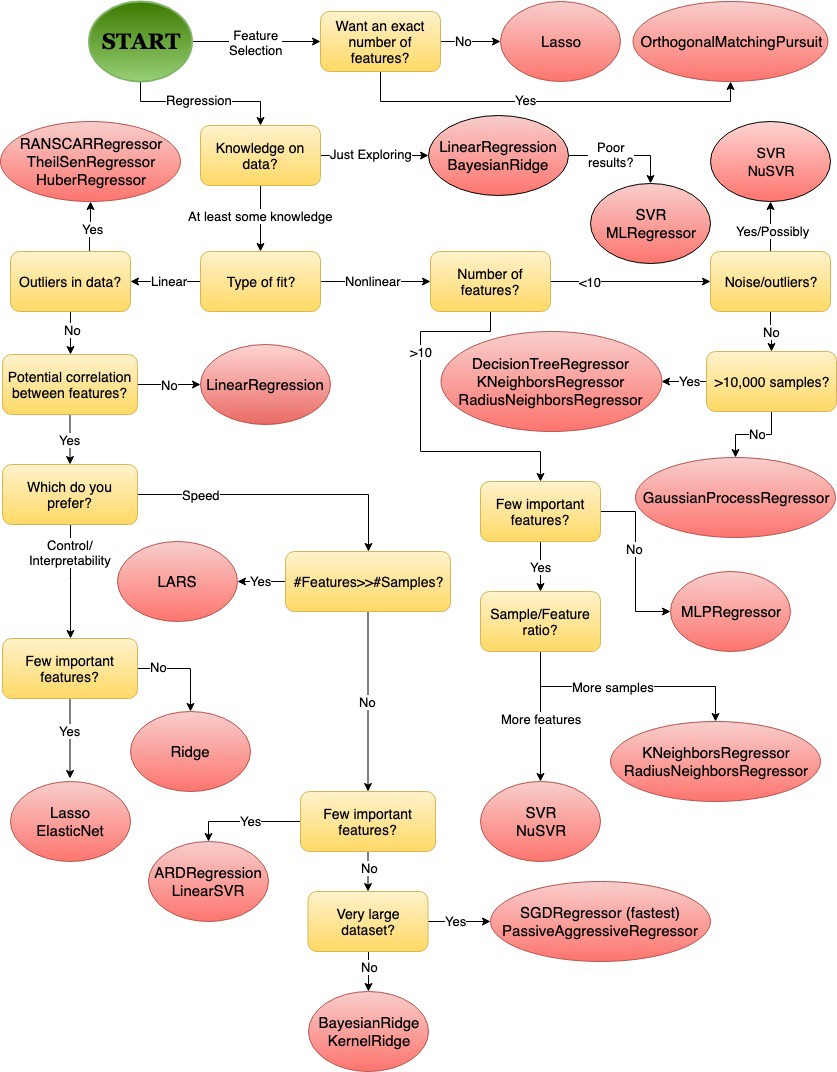

_Image source:_ https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5

Let us try the BayesianRidge regressor.

In [123]:
from sklearn.linear_model import BayesianRidge

BR = BayesianRidge()
BR.fit(X_train, y_train)
score = BR.score(X_test, y_test)
score

0.06497097889177272

We are achieving rather poor results from linear regression and BayesianRidge. Let us try SVR and MLRegressor.

In [149]:
from sklearn.svm import SVR

SVR=SVR(C=0.85, epsilon=0.1)   #experimenting with the C and epsilon values to increase score
SVR.fit(X_train, y_train)
score = SVR.score(X_test, y_test)
score

0.3194691587709847

The score has improved significantly.

Since the model is better suited to be non-linear (MSE in LR is very high), and we do not have any particularly important features (number of features $>$ 10), we try a simple neural network.

In [151]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [440]:
#Reference: https://github.com/Tools-For-Data-Science-SOC/reading-material/blob/main/Week4_neuralNet.ipynb
class NetModel(nn.Module):
    # Init is the constructor for this python class
    # The self is like the keyword this in c++, which basically tells the complier
    # that we are refering to the current instance of the class
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, no_class=1):
        super(NetModel, self).__init__() # this statement calls the constructor of our parent class which is nn.Module
        
        self.linear1 = nn.Linear(input_dim, hidden1_dim)
        self.linear2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.linear3 = nn.Linear(hidden2_dim, no_class)
    
    # we define a function called forward for forward propagation
    # Note: we have to name the function forward
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
    
model = NetModel(X_test.shape[1], 35, 20)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_func  = nn.MSELoss()


X_train = Variable(torch.from_numpy(np.asarray(X_train))).float()
y_train = Variable(torch.from_numpy(np.asarray(y_train))).float()
X_test  = Variable(torch.from_numpy(np.asarray(X_test))).float()
y_test  = Variable(torch.from_numpy(np.asarray(y_test))).float()

In [441]:
epochs = 1350
Loss = []

for i in range(epochs):

    # Dataloaders are used to split this whole data into batches, add padding, etc
    y_pred = model(X_train) 
    
    # Calculating the loss
    loss = loss_func(y_pred, y_train)
    Loss.append(loss.item())
    
    # This calculates the gradient and updates the weights for our model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/Applications/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([94])) that is different to the input size (torch.Size([94, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


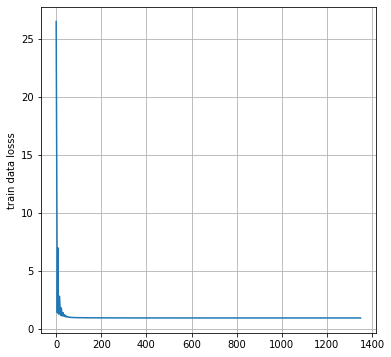

In [442]:
plot, (ax1) = plt.subplots(1, figsize=(6, 6))

ax1.plot(Loss)
ax1.set_ylabel("train data losss")

ax1.grid()

In [443]:
Loss=np.asarray(Loss)

In [444]:
Loss.mean()

1.0175689340520788

The neural network has linear layers and upon various runs, the parameters for the NN chosen give an optimised loss function for the target (pIC50).

## Conclusion

We wish to be able to use a suitable model for computational drug discovery as a ligand targeting the protein **Anoctamin-1** in breast cancer and its treatment. The above project was an effort in doing the same and analysing various models for their suitability in prediction by regression. 

The target variable was chosen as a measure of the effective concentration of the drug-like compound needed to target the protein effectively, _i.e_ pIC50. 

Since the features were large in number and not necessarily correlated, we have now found that the model required was to be non-linear. Later we also tested a neural network on it. The "best" performance was that of the Support Vector Regressor with a score of 30 %. The neural network too was optimised to obtain a mean RMSE of ```1.0175689340520788```. 

## Future Scope

This project can further be carried forward by improving the model parameters and better analysis into the same. Further, the neural networks can also be made more complex.